<font size="5"> Term Project Step 1 -  STA 6714</font> <br>\
<font size="5"> Mina Akhondzadeh</font>



**1. The description of variables and the target problems you will answer.**

https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis

This repository holds the data from a cohort of **pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021**. <br>

Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity. <br>

This data has 782 rows and 58 columns. There is a combination of binary, categorical, integer and continuous predictor columns. <br>

From column 25 onwards there are multiple columns with na values majorly. These columns are also very specialized and we might not be able to interprete them as good as the other columns. Therefore we will make a selection of the features that are good candidates for our model based on the number of NA values and colinearity.

In [1]:
#load requiered libraries
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df = readxl::read_excel("C:\\Users\\minaa\\Desktop\\Statistics\\Spring 2024\\STA 6714\\Term Project\\app_data.xlsx")
head(df)
dim(df)

Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,⋯,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
12.68,16.899999999999999,female,148,37.0,3,conservative,uncomplicated,appendicitis,appendicitis,⋯,NA,yes,reUB,NA,NA,NA,NA,NA,NA,NA
14.10,31.9,male,147,69.5,2,conservative,uncomplicated,appendicitis,no appendicitis,⋯,NA,NA,NA,NA,NA,NA,NA,yes,NA,NA
14.14,23.3,female,163,62.0,4,conservative,uncomplicated,appendicitis,no appendicitis,⋯,NA,NA,NA,NA,NA,NA,NA,yes,yes,NA
16.37,20.6,female,165,56.0,3,conservative,uncomplicated,appendicitis,no appendicitis,⋯,NA,yes,reUB,NA,NA,NA,NA,NA,yes,NA
11.08,16.899999999999999,female,163,45.0,3,conservative,uncomplicated,appendicitis,appendicitis,⋯,NA,yes,reUB,NA,NA,NA,NA,NA,yes,NA
11.05,30.7,male,121,45.0,3,conservative,uncomplicated,appendicitis,no appendicitis,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 782  58

Let's see what percentage of each column is NULL value.

In [3]:
NA_percentage <- df %>%
  summarise_all(~mean(is.na(.)) * 100) %>%
  mutate_all(.funs = ~round(., digits = 2))
NA_percentage

Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,⋯,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.13,3.45,0.26,3.32,0.38,0.51,0.13,0.13,0.26,0.26,⋯,98.34,74.04,84.53,87.34,94.5,92.33,90.92,82.1,91.56,96.68


We can eliminate the features which have more than 20% NULL values, because they are not giving us enough information to train a model on them. <br>

Among 3 target variables (diagnosis, management and severity), we are going to pick "Diagnosis" as our only target valuable and try to find the best model for predicting this column.

In [4]:
#Only keep columns with less than 20% NA values.
selected_features <- NA_percentage %>% 
                        select_if(~all(. < 20)) %>% 
                        colnames()

#Remove other two target columns and only keep "Diagnosis" as our target column. Also put the target column at the end.
selected_features <- c(selected_features[-c(7,8, 10)], selected_features[10])
selected_features

df_clean <- df[,selected_features]
head(df_clean)

[1] "Age"                              "BMI"                             
 [3] "Sex"                              "Height"                          
 [5] "Weight"                           "Length_of_Stay"                  
 [7] "Diagnosis_Presumptive"            "Alvarado_Score"                  
 [9] "Paedriatic_Appendicitis_Score"    "Appendix_on_US"                  
[11] "Migratory_Pain"                   "Lower_Right_Abd_Pain"            
[13] "Contralateral_Rebound_Tenderness" "Coughing_Pain"                   
[15] "Nausea"                           "Loss_of_Appetite"                
[17] "Body_Temperature"                 "WBC_Count"                       
[19] "Neutrophil_Percentage"            "Neutrophilia"                    
[21] "RBC_Count"                        "Hemoglobin"                      
[23] "RDW"                              "Thrombocyte_Count"               
[25] "CRP"                              "Dysuria"                         
[27] "Stool"                            "Peritonitis"                     
[29] "Psoas_Sign"                       "US_Performed"                    
[31] "US_Number"                        "Free_Fluids"                     
[33] "Diagnosis"

Age,BMI,Sex,Height,Weight,Length_of_Stay,Diagnosis_Presumptive,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,⋯,Thrombocyte_Count,CRP,Dysuria,Stool,Peritonitis,Psoas_Sign,US_Performed,US_Number,Free_Fluids,Diagnosis
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
12.68,16.899999999999999,female,148,37.0,3,appendicitis,4,3,yes,⋯,254,0,no,normal,no,yes,yes,882,no,appendicitis
14.10,31.9,male,147,69.5,2,appendicitis,5,4,no,⋯,151,3,yes,normal,no,yes,yes,883,no,no appendicitis
14.14,23.3,female,163,62.0,4,appendicitis,5,3,no,⋯,300,3,no,constipation,no,yes,yes,884,no,no appendicitis
16.37,20.6,female,165,56.0,3,appendicitis,7,6,no,⋯,258,0,yes,normal,no,yes,yes,886,no,no appendicitis
11.08,16.899999999999999,female,163,45.0,3,appendicitis,5,6,yes,⋯,311,0,no,constipation,no,yes,yes,887,no,appendicitis
11.05,30.7,male,121,45.0,3,appendicitis,6,7,no,⋯,249,63,no,diarrhea,no,yes,yes,888,no,no appendicitis


Checking out the entire dataframe value types in one glance.

In [5]:
str(df_clean)

tibble [782 × 33] (S3: tbl_df/tbl/data.frame)
 $ Age                             : num [1:782] 12.7 14.1 14.1 16.4 11.1 ...
 $ BMI                             : chr [1:782] "16.899999999999999" "31.9" "23.3" "20.6" ...
 $ Sex                             : chr [1:782] "female" "male" "female" "female" ...
 $ Height                          : num [1:782] 148 147 163 165 163 121 140 NA 131 174 ...
 $ Weight                          : num [1:782] 37 69.5 62 56 45 45 38.5 21.5 26.7 45.5 ...
 $ Length_of_Stay                  : num [1:782] 3 2 4 3 3 3 3 2 3 3 ...
 $ Diagnosis_Presumptive           : chr [1:782] "appendicitis" "appendicitis" "appendicitis" "appendicitis" ...
 $ Alvarado_Score                  : num [1:782] 4 5 5 7 5 6 5 3 7 4 ...
 $ Paedriatic_Appendicitis_Score   : num [1:782] 3 4 3 6 6 7 6 3 6 4 ...
 $ Appendix_on_US                  : chr [1:782] "yes" "no" "no" "no" ...
 $ Migratory_Pain                  : chr [1:782] "no" "yes" "no" "yes" ...
 $ Lower_Right_Abd_Pain     

<font size="5"> **Description of variables**</font>

In [6]:
#Create a table of variables and their description.
var_description = data.frame(Description = character(33), row.names = colnames(df_clean))
var_description$Description= c("Obtained from the date of birth", 
"Measures body fat",
  "Registered gender", 
  "Patient's height",
   "Patient's weight", 
   "Length of the stay in the hospital",
  "Patient's suspected diagnosis",
  "Patient's score according to the scoring system",
  "Patient's score according to the scoring system",
  "Detectability of the vermiform appendix during sonographic examination",
  "Abdominal pain; usually starts in epigastrium and moves to the right lower quadrant",
  "Right iliac fossa pain detected on palpation", 
   "A state in which pain of the contralateral side (usually, the right lower quadrant) is felt on the release of pressure (usually, in the left lower quadrant) over the abdomen",
  "Abdominal pain by forced cough", 
  "Feeling of sickness/ejection of contents from stomach through the mouth", 
  "", 
  "Measured by a thermometer placed in the rectum or in the auditory canal",
  "The number of leucocytes in a unit volume of blood; inflammation parameter",
  "Mature WBC in the granulocytic series", 
  "Relative neutrophilic leucocytosis, often a result of a bacterial infection", 
  "The number of erythrocytes in a unit volume of blood",
  "Hemoglobin level; a red protein in the red blood cells that contains iron and is responsible for transporting oxygen", 
  "A blood test that measures the differences in the volume and size of the erythrocytes", 
  "The number of platelets in a unit volume of blood", 
"Protein produced by the liver, elevated in case of inflammation, infection, or injury", 
"Pain or other difficulty during urination",
 "Characteristics of bowel movements", 
"Spasm of abdominal wall muscles detected on palpation, usually a result of inflammation", 
"Abdominal pain produced by extension of the hip", 
"If an abdominal ultrasonography was performed or not",
"", 
"Free fluids inside the abdomen",
"(TARGET)Patient's diagnosis, histologically confirmed for operated patients. Conservatively managed patients were labelled as having appendicitis if they had an AS or PAS of ≥ 4 and an appendix diameter of ≥ 6 mm")


In [7]:
var_description

,Description
,<chr>
Age,Obtained from the date of birth
BMI,Measures body fat
Sex,Registered gender
Height,Patient's height
Weight,Patient's weight
Length_of_Stay,Length of the stay in the hospital
Diagnosis_Presumptive,Patient's suspected diagnosis
Alvarado_Score,Patient's score according to the scoring system
Paedriatic_Appendicitis_Score,Patient's score according to the scoring system


In [8]:
#Eliminate the two rows that have null values for the target column.
df_clean = df_clean[complete.cases(df_clean$Diagnosis),]

<font size = "5"> **Some Data Exploratory Analysis** </font>

In [9]:
M_plot <- df_clean %>%
        group_by(Diagnosis) %>%
        summarise(count = n()) %>%
        mutate(percentage = count * 100 / sum(count),
               label = paste0(count, ", ", round(percentage), "%"))
M_plot

Diagnosis,count,percentage,label
<chr>,<int>,<dbl>,<chr>
appendicitis,463,59.35897,"463, 59%"
no appendicitis,317,40.64103,"317, 41%"


**Distribution of the target variable classes**

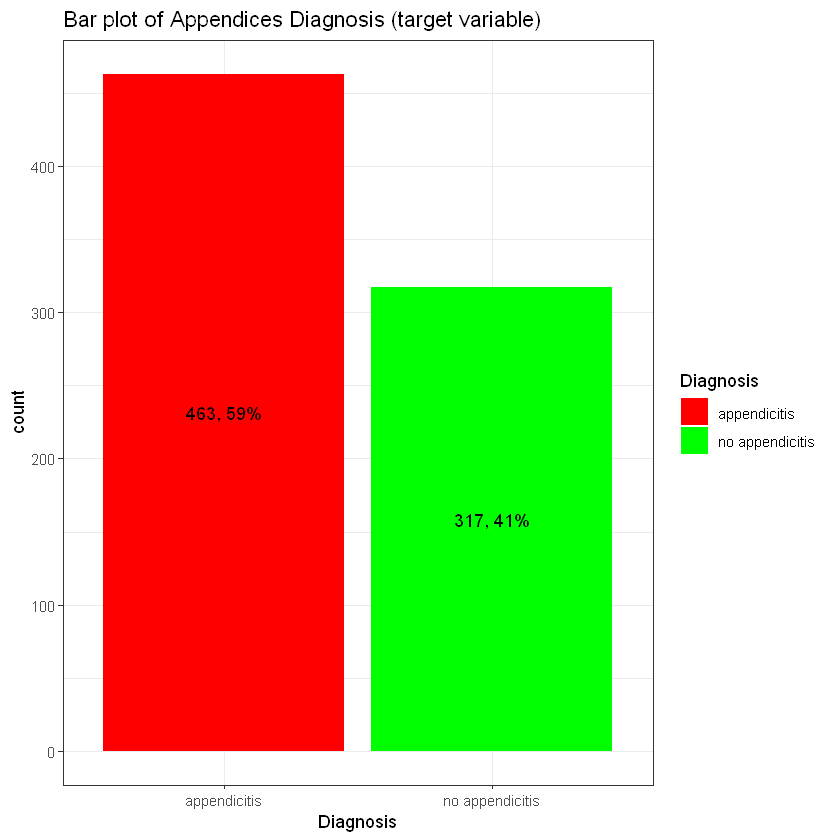

In [10]:
ggplot(M_plot) +
aes(x=Diagnosis, y=count, label=label, fill=Diagnosis) +
geom_col() +
geom_text(position = position_stack(0.5)) +
scale_fill_manual(values = c("red", "green")) +
theme_bw() +
labs(title = "Bar plot of Appendices Diagnosis (target variable)")

We see that our data is not unbalanced and it has enough data points for each class.

**Histogram of Weigth**

In [11]:
#Average of Weigth column
avg_mean = mean(na.omit(df_clean$Weight))

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"Removed 2 rows containing non-finite values (`stat_bin()`)."


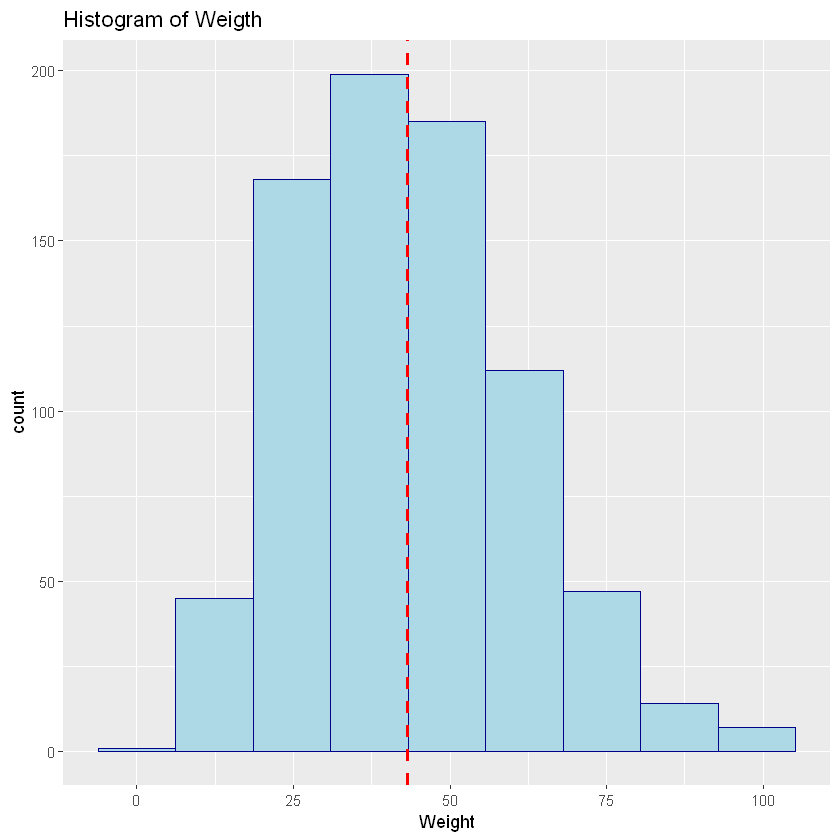

In [12]:
ggplot(df_clean) +
aes(x = Weight) +
geom_histogram(bins = 9, color = "darkblue", fill = "lightblue") +
geom_vline(xintercept=avg_mean, color = "red", linetype = "dashed", size = 1) +
labs(title = "Histogram of Weigth") 

The weight variable has an approximately normal distribution with average around 40. Note that the weigth is in kg and not lb.

**Distribution of Age in two classes of Diagnosis variable**

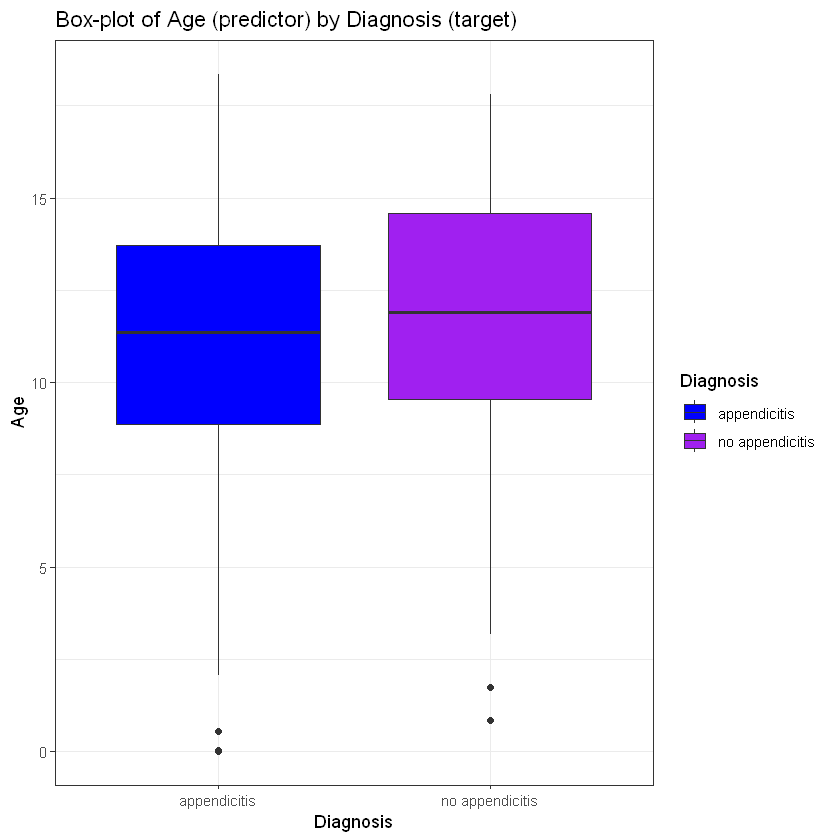

In [13]:
ggplot(df_clean) + 
  aes(x = Diagnosis,y = Age, fill = Diagnosis) +
  geom_boxplot() + 
  theme_bw() + 
  labs(
    title = "Box-plot of Age (predictor) by Diagnosis (target)",
    ) +
  scale_fill_manual(
    values = c(
      "blue","purple"
    )
  )

The median of "no appendicitis" is slightly higher than "appendicitis" but overall they have a similar distribution with medians between 10 and 15.

**Correlation matrix and the heat map for numerical variables**

In [14]:
library(ggcorrplot)

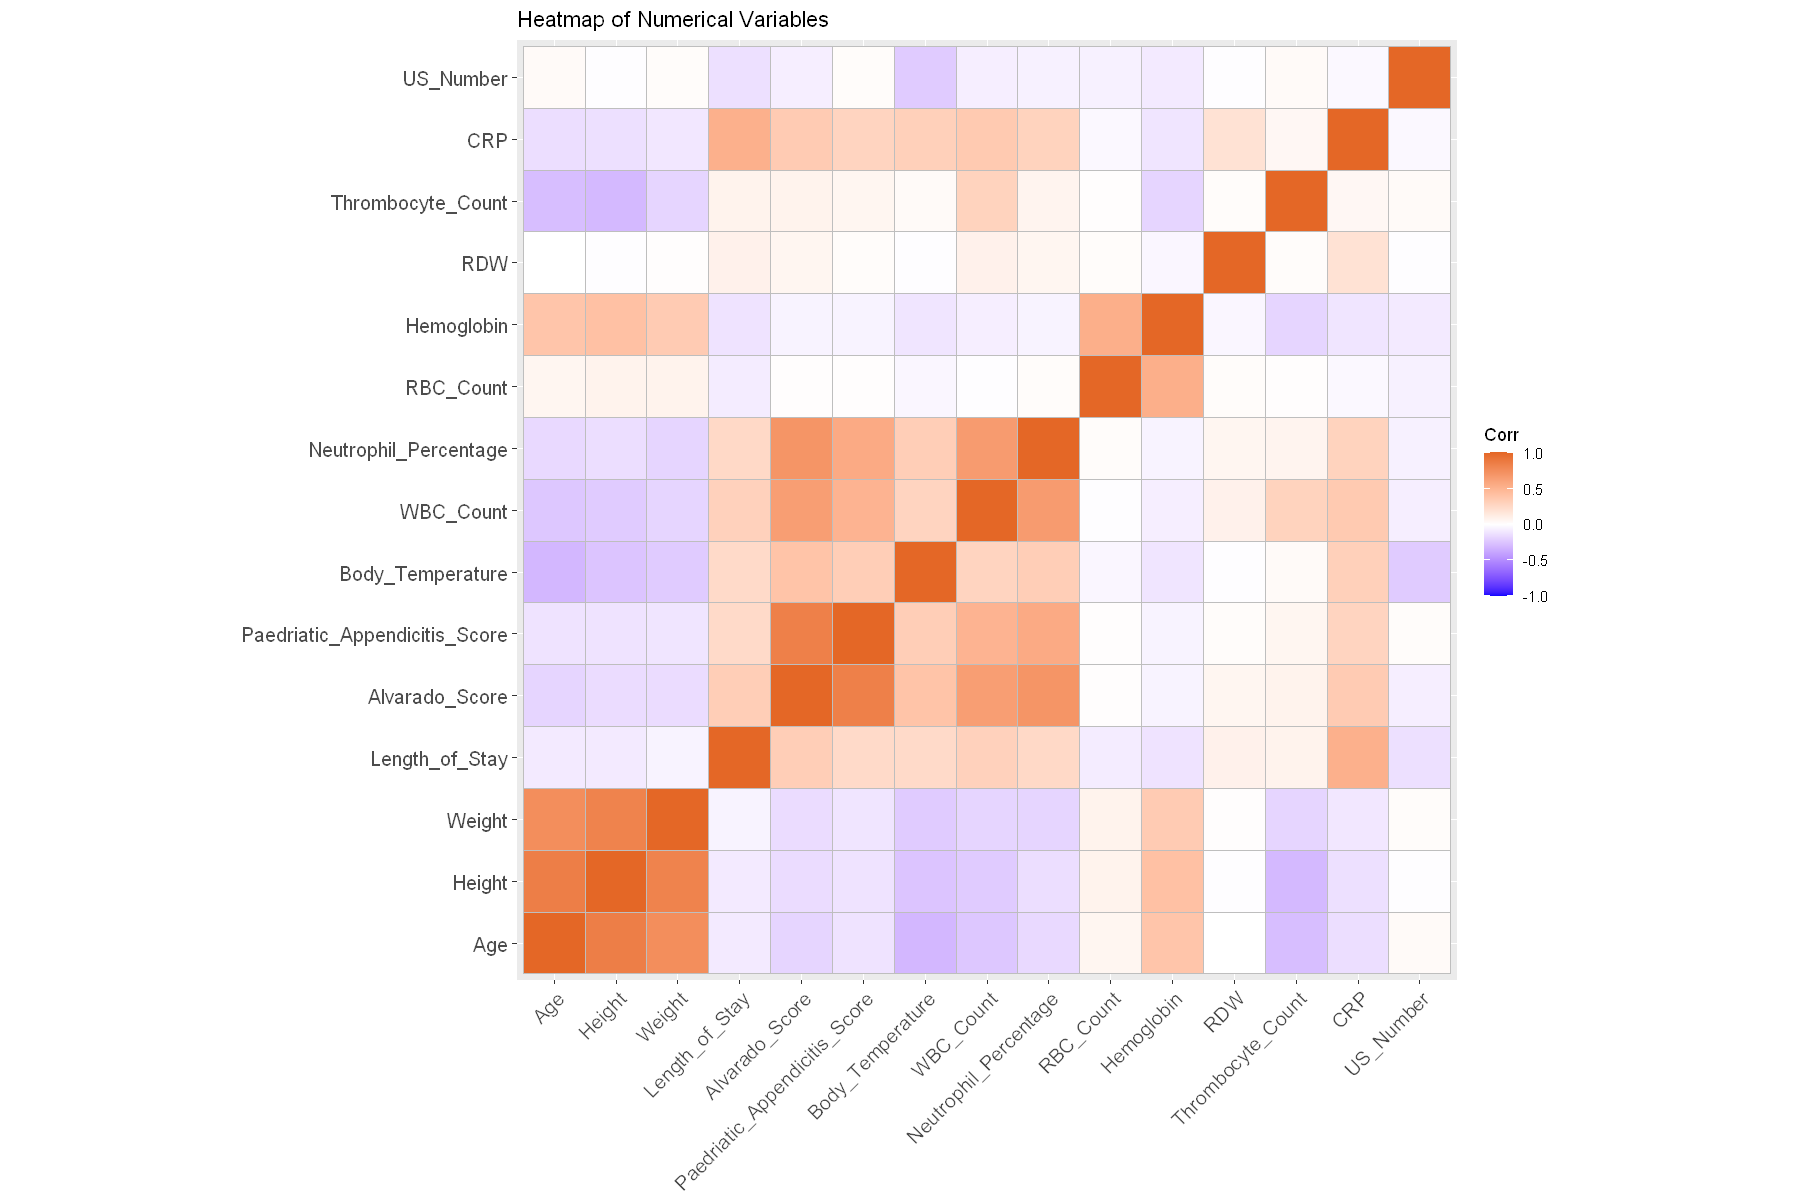

In [15]:
#Only selecting the numeric variables to get the correlation matrix
options(repr.plot.width = 15, repr.plot.height = 10)

numeric_df = select_if(df_clean, is.numeric)
cor.mat = cor(na.omit(numeric_df))
ggcorrplot(cor.mat,
           ggtheme = ggplot2::theme_gray,
           colors = c("blue", "white", "#E46726"), title = "Heatmap of Numerical Variables")


Between the numerical variables, we observe that Age, Weigth and Heigth are highly correlated (positive). <br>
Also Alvarado_Score and Paedriatic_Appendicitis_Score are positively correlated. <br>
Rest of the numerical variables are less correlated with each other, so in the next steps we might select one variable from each strongly correlated pairs and exclude the other one for our model.

**2. What statistical model will you use (classification or regression or others)?**

NA (missing) values in the dataset will be taken care of later. Dealing with missing values is a crucial preprocessing step. Common approaches include imputation (replacing missing values with estimated values) or removal of rows or columns with missing values. <br>

We will use classification models to predict the target values. <br>
Along the road we can use logistic regression, decision tree classification, random forest and xgboost.

In [16]:
#target column unique values
unique(df_clean[, "Diagnosis"])

Diagnosis
<chr>
appendicitis
no appendicitis
